# Divorce Predictors

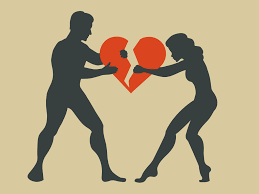

## Imports

In [ ]:
import os,re,zipfile
import pandas as pd
import numpy as np
from types import SimpleNamespace
from matplotlib import pyplot as plt
plt.style.use('dark_background')
plt.style.use('seaborn')

## Data

### Data Dictionary

1. If one of us apologizes when our discussion deteriorates, the discussion ends. 
2. I know we can ignore our differences, even if things get hard sometimes. 
3. When we need it, we can take our discussions with my spouse from the beginning and correct it. 
4. When I discuss with my spouse, to contact him will eventually work. 
5. The time I spent with my wife is special for us. 
6. We don't have time at home as partners. 
7. We are like two strangers who share the same environment at home rather than family. 
8. I enjoy our holidays with my wife. 
9. I enjoy traveling with my wife. 
10. Most of our goals are common to my spouse. 
11. I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other. 
12. My spouse and I have similar values in terms of personal freedom. 
13. My spouse and I have similar sense of entertainment. 
14. Most of our goals for people (children, friends, etc.) are the same. 
15. Our dreams with my spouse are similar and harmonious. 
16. We're compatible with my spouse about what love should be. 
17. We share the same views about being happy in our life with my spouse 
18. My spouse and I have similar ideas about how marriage should be 
19. My spouse and I have similar ideas about how roles should be in marriage 
20. My spouse and I have similar values in trust. 
21. I know exactly what my wife likes. 
22. I know how my spouse wants to be taken care of when she/he sick. 
23. I know my spouse's favorite food. 
24. I can tell you what kind of stress my spouse is facing in her/his life. 
25. I have knowledge of my spouse's inner world. 
26. I know my spouse's basic anxieties. 
27. I know what my spouse's current sources of stress are. 
28. I know my spouse's hopes and wishes. 
29. I know my spouse very well. 
30. I know my spouse's friends and their social relationships. 
31. I feel aggressive when I argue with my spouse. 
32. When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’ . 
33. I can use negative statements about my spouse's personality during our discussions. 
34. I can use offensive expressions during our discussions. 
35. I can insult my spouse during our discussions. 
36. I can be humiliating when we discussions. 
37. My discussion with my spouse is not calm. 
38. I hate my spouse's way of open a subject. 
39. Our discussions often occur suddenly. 
40. We're just starting a discussion before I know what's going on. 
41. When I talk to my spouse about something, my calm suddenly breaks. 
42. When I argue with my spouse, ı only go out and I don't say a word. 
43. I mostly stay silent to calm the environment a little bit. 
44. Sometimes I think it's good for me to leave home for a while. 
45. I'd rather stay silent than discuss with my spouse. 
46. Even if I'm right in the discussion, I stay silent to hurt my spouse. 
47. When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger. 
48. I feel right in our discussions. 
49. I have nothing to do with what I've been accused of. 
50. I'm not actually the one who's guilty about what I'm accused of. 
51. I'm not the one who's wrong about problems at home. 
52. I wouldn't hesitate to tell my spouse about her/his inadequacy. 
53. When I discuss, I remind my spouse of her/his inadequacy. 
54. I'm not afraid to tell my spouse about her/his incompetence. 

### Load Data

In [ ]:
zip_name = 'divorce.csv'

if zip_name not in os.listdir('.'):
    !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00497/divorce.rar
    !unrar e divorce.rar
os.listdir('.')

['.config',
 'divorce.csv',
 'divorce.xlsx',
 'divorce.rar',
 'divorce_text.csv',
 'sample_data']

In [ ]:
df = pd.read_csv('divorce.csv',sep=';')
df

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,3,4,0,0,4,0,1,0,1,0,0,0,0,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,1,3,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,2,1,3,3,0,2,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,4,1,2,1,1,0,4,3,3,2,2,3,2,4,3,1,0


## Model

**XGBoost + Hyper-Parameters Tuning**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest

In [ ]:
param_grid = {
    "learning_rate"    : [0.05, 0.10 ],
    "max_depth"        : [ 1, 4, 7, 14, 20],
    "min_child_weight" : [ 3, 5, 7 ],
    "gamma"            : [ 0.1, 0.3],
    "colsample_bytree" : [ 0.3, 0.5 , 0.7 ],
    "n_estimators" : [ 1000 ],
    "objective": ['binary:logistic','multi:softmax','multi:softprob'],
    "num_class": [df.Class.nunique()]
 }

In [ ]:
xgc = xgb.XGBClassifier()
grid = GridSearchCV(xgc, param_grid, cv=3,verbose=10,n_jobs=-1)
grid.fit(df[df.columns[:-1]],df['Class'])

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_po...
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.5, 0.7],
                         'gamma': [0.1, 0.3], 'learning_rate': [0.05, 0.1],
                         'max_depth': [1, 4, 7, 14, 20],
                         'min_child_weight': [3, 5, 7], 'n_estimators': [1000],


**Best Hyper-Parameters**

In [ ]:
for k,v in grid.best_params_.items():
    print(f'{k} : {v}')

colsample_bytree : 0.3
gamma : 0.1
learning_rate : 0.1
max_depth : 4
min_child_weight : 3
n_estimators : 1000
num_class : 2
objective : multi:softmax


**Feature Importance**

After tuning the most important questions are:

- 18. My spouse and I have similar ideas about how marriage should be
- 20. My spouse and I have similar values in trust.
- 40. We're just starting a discussion before I know what's going on.

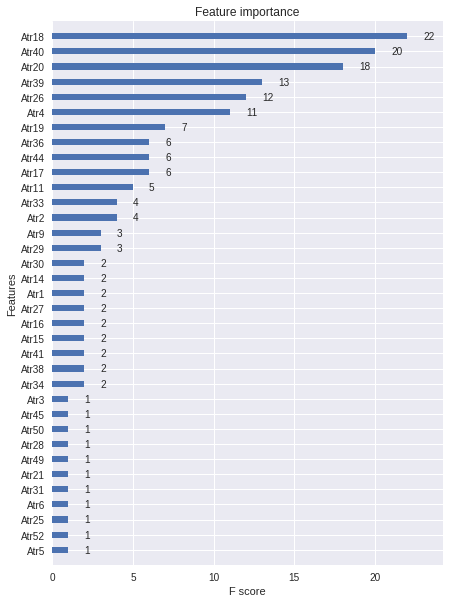

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(7,10))
xgb.plot_importance(grid.best_estimator_,height=.4,ax=ax)

## Anomalies

In [ ]:
isf = IsolationForest(n_estimators=1000,n_jobs=-1)
anomalies = isf.fit_predict(df)

In [ ]:
df['anomalies'] = anomalies

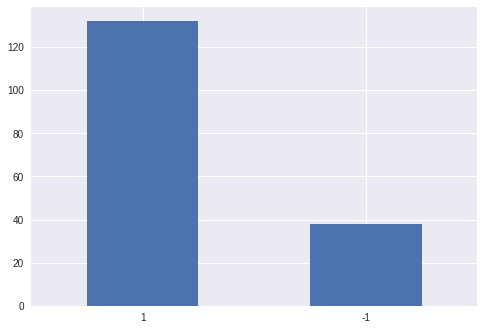

In [ ]:
df.anomalies.value_counts().plot.bar(rot=0)

**Top 3 Samples with Anomalies**

In [ ]:
df[df.anomalies == -1][:3]

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class,anomalies
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1,-1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1,-1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1,-1
